w=1.821434,b=3.180031
result= [5.6316815]


C:\Users\29685\AppData\Local\Temp\ipykernel_15872\3545841407.py:73: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("w=%f,b=%f" %(net.w, net.b))


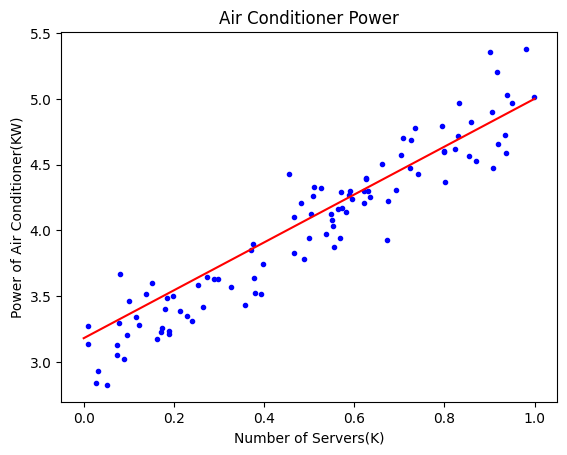

In [1]:

import numpy as np
import matplotlib.pyplot as plt

from HelperClass.DataReader_1_0 import *

file_name = "ch04.npz"

class NeuralNet_0_1(object):
    def __init__(self, eta):
        self.eta = eta
        self.w = 0
        self.b = 0

    def __forward(self, x):
        z = x * self.w + self.b
        return z

    def __backward(self, x,y,z):
        dz = z - y
        db = dz
        dw = x * dz
        return dw, db

    def __update(self, dw, db):
        self.w = self.w - self.eta * dw
        self.b = self.b - self.eta * db

    def train(self, dataReader):
        for i in range(dataReader.num_train):
            # get x and y value for one sample
            x,y = dataReader.GetSingleTrainSample(i)
            # get z from x,y
            z = self.__forward(x)
            # calculate gradient of w and b
            dw, db = self.__backward(x, y, z)
            # update w,b
            self.__update(dw, db)
        # end for

    def inference(self, x):
        return self.__forward(x)

# end class

def ShowResult(net, dataReader):
    X,Y = dataReader.GetWholeTrainSamples()
    # draw sample data
    plt.plot(X, Y, "b.")
    # draw predication data
    PX = np.linspace(0,1,10)
    PZ = net.inference(PX)
    plt.plot(PX, PZ, "r")
    plt.title("Air Conditioner Power")
    plt.xlabel("Number of Servers(K)")
    plt.ylabel("Power of Air Conditioner(KW)")
    plt.show()


if __name__ == '__main__':
    # read data
    sdr = DataReader_1_0(file_name)
    sdr.ReadData()
    # create net
    eta = 0.1
    net = NeuralNet_0_1(eta)
    net.train(sdr)
    # result
    print("w=%f,b=%f" %(net.w, net.b))
    # predication
    result = net.inference(1.346)
    print("result=", result)
    ShowResult(net, sdr)
